In [23]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')
np.random.seed(42)

In [2]:
dataset = [[2.7810836,2.550537003],
           [1.465489372,2.362125076],
           [3.396561688,4.400293529],
           [1.38807019,1.850220317],
           [3.06407232,3.005305973],
           [7.627531214,2.759262235],
           [5.332441248,2.088626775],
           [6.922596716,1.77106367],
           [8.675418651,-0.242068655],
           [7.673756466,3.508563011]]
label = [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]

In [11]:
def gini_index(data):
    class_count = dict()
    total_num = len(data)
    gini = 1
    for label in data:
        if label in class_count:
            class_count[label] += 1
        else:
            class_count[label] = 1
    for _, count in class_count.items():
        gini -= (count / total_num)**2
    return gini

In [13]:
gini_index([0, 0, 0, 1])

0.375

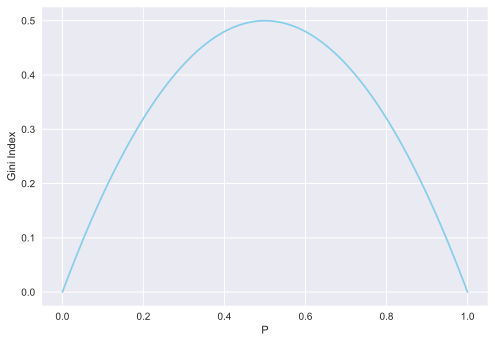

In [15]:
ax = plt.subplot()
x = np.linspace(0, 1, 100)
y = 1 - x**2 - (1 - x)**2
ax.plot(x, y, color='skyblue')
ax.set(xlabel='P', ylabel='Gini Index')
plt.show()

In the past few tutorials, we implemented our machine learning algorithms by stitching together different functions in a single wrapper function. While this organization certainly works, I realized that it would be more pythonic to use classes to achieve the same purporse instead. After all, actual machine learning libraries such as `sklearn` use class-based implementations to allow the user to import the model of their choice with ease. Let's up the game by doing the same. We start with a class declaration and a constructor that takes a single hyperparameter, `max_depth`, which specifies how deep the tree can grow. We can also consider it the distance between the last child and the root node.

In [31]:
class DecisionTreeClassifier:
    def __init__(self, max_depth=None):
        self.max_depth = max_depth

Before we add more functions to the `DecisionTreeClassifier` class, let's quicky write a `Node` helper class that we will use to implement a decision tree. The `Node` object is going to represent a single branch of a binary decision tree. Therefore, it needs to encapsulate the following pieces of information:

* The predicted class of the instances under the node
* Instances that go to the left and rightward branch of the node
* The feature index and threshold value used to generate the node

The code snippet below demonstrates how one might go about representing this idea. 

In [32]:
class Node:
    def __init__(self, predicted_class):
        self.left = None
        self.right = None
        self.feature_index = 0
        self.threshold = 0
        self.predicted_class = predicted_class

Great! Now we need to     

In [52]:
def best_split(self, X, y):
    m = y.size
    if m < 2:
        return None, None
    num_parent = [np.sum(y == c) for c in self.n_classes] 
    best_gini = 1.0 - sum((n / m)**2 for n in num_parent)
    best_idx, best_thr = None, None
    for idx in range(self.n_features):
        thresholds, classes = zip(*sorted(zip(X[:, idx], y)))
        num_left = [0] * len(self.n_classes)
        num_right = num_parent.copy()
        for i in range(1, m):
            c = classes[i - 1]
            num_left[c] += 1
            num_right[c] -= 1
            gini_left = 1.0 - sum((num_left[x] / i) ** 2 for x in self.n_classes)
            gini_right = 1.0 - sum((num_right[x] / (m - i)) ** 2 for x in self.n_classes)
            gini = (i * gini_left + (m - i) * gini_right) / m
            if thresholds[i] == thresholds[i - 1]:
                continue
            if gini < best_gini:
                best_gini = gini
                best_idx = idx
                best_thr = (thresholds[i] + thresholds[i - 1]) / 2
    return best_idx, best_thr

DecisionTreeClassifier.best_split = best_split

In [45]:
def fit(self, X, y):
    self.n_classes = set(y)
    self.n_features = X.shape[1]
    self.tree = self.grow_tree(X, y)

DecisionTreeClassifier.fit = fit

In [53]:
def grow_tree(self, X, y, depth=0):
    num_samples_per_class = [np.sum(y == i) for i in self.n_classes]
    predicted_class = np.argmax(num_samples_per_class)
    node = Node(predicted_class=predicted_class)
    if depth < self.max_depth:
        idx, thr = self.best_split(X, y)
        if idx is not None:
            indices_left = X[:, idx] < thr
            X_left, y_left = X[indices_left], y[indices_left]
            X_right, y_right = X[~indices_left], y[~indices_left]
            node.feature_index = idx
            node.threshold = thr
            node.left = self.grow_tree(X_left, y_left, depth + 1)
            node.right = self.grow_tree(X_right, y_right, depth + 1)
    return node

DecisionTreeClassifier.grow_tree = grow_tree

In [48]:
def _predict(self, inputs):
    node = self.tree
    while node.left:
        if inputs[node.feature_index] < node.threshold:
            node = node.left
        else:
            node = node.right
    return node.predicted_class

DecisionTreeClassifier._predict = _predict

In [39]:
def predict(self, X):
    return np.array([self._predict(inputs) for inputs in X])

DecisionTreeClassifier.predict = predict

In [40]:
def my_train_test_split(X, y, test_size, random_state=None):
    data_num = len(y)
    test_num = int(test_size * data_num)
    if random_state != None: np.random.seed(random_state)
    index = np.random.permutation(data_num)
    X_train = X[index[:-test_num]]
    X_test = X[index[-test_num:]]
    y_train = y[index[:-test_num]]
    y_test = y[index[-test_num:]]
    return X_train, X_test, y_train, y_test

In [50]:
from sklearn.datasets import load_iris

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = my_train_test_split(X, y, 0.1)
clf = DecisionTreeClassifier(max_depth=20)
clf.fit(X_train, y_train)
clf.predict(X_test)

array([1, 1, 1, 0, 1, 2, 2, 1, 1, 2, 2, 0, 0, 2, 2])

In [51]:
y_test

array([1, 1, 1, 0, 1, 2, 2, 1, 1, 2, 2, 0, 0, 2, 2])

# Conclusion

I personally had a lot of struggle 